In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import os
import sys

In [3]:
# Plot metrics for each celltype
def plot_metric(all_metrics, figsize=(8,6)):
    cols = ['Accuracy', 'Precision', 'F1-score', 'ROC-AUC', 'PR-AUC']
    ax = all_metrics[cols].plot.bar(rot=90, figsize=figsize)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## XGBoost

In [4]:
# xgb_l1 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\XGB_model2\XGBclassifier_binary_metrics_l1.csv", index_col=0)
# xgb_l1_deg = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\DEG_L1\XGBclassifier_DEG_metrics_l1.csv", index_col=0)
xgb_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/XGB_model2/XGBclassifier_binary_metrics_l1.csv', index_col=0)
xgb_l1_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/DEG_L1/XGBclassifier_DEG_metrics_l1.csv', index_col=0)

In [5]:
diff = xgb_l1 - xgb_l1_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
B,0.000317,0.000910,0.002808,0.001861,0.000070,0.000490,0.002033
CD4_T,0.022742,0.044011,0.045639,0.044826,0.006855,0.020398,0.060061
CD8_T,0.005996,0.017882,0.020908,0.019437,0.003732,0.012310,0.022952
DC,0.000108,0.002446,0.002437,0.002446,0.000056,0.003068,0.002499
Mono,0.001236,0.004222,-0.000255,0.002009,0.000365,0.000975,0.002875
NK,0.000464,0.003573,0.000335,0.001959,0.000166,0.001366,0.002219
other,0.000580,-0.011905,0.043207,0.023058,0.034026,0.042329,0.019525
other_T,0.001205,0.009867,0.020255,0.015427,0.001808,0.011639,0.015854


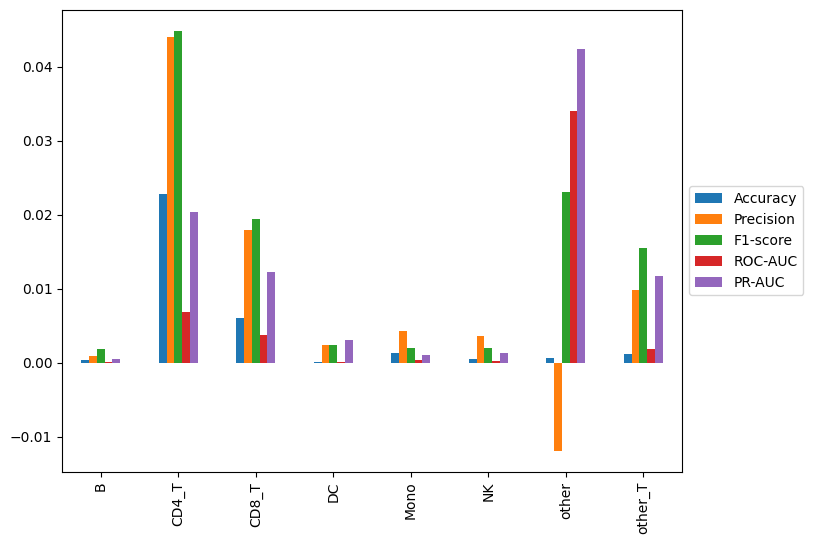

In [6]:
plot_metric(diff)

In [7]:
# xgb_l2 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\XGB_model\XGBclassifier_binary_metrics_l2.csv", index_col=0)
# xgb_l2_deg = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\DEG_L2\XGBclassifier_DEG_binary_metrics_l2.csv", index_col=0)
xgb_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/XGB_model/XGBclassifier_binary_metrics_l2.csv', index_col=0)
xgb_l2_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/XGBclassifier_DEG_binary_metrics_l2.csv', index_col=0)

In [8]:
diff = xgb_l2 - xgb_l2_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,7.727975e-06,-0.015404,0.034615,0.017532,-0.000069,-0.010644,0.013624
B_intermediate,9.272782e-04,0.016482,0.051928,0.036852,0.000886,0.022723,0.035961
B_memory,1.182279e-03,0.028592,0.030059,0.029282,0.000349,0.017229,0.029908
B_naive,4.095457e-04,0.005017,0.003401,0.004209,0.000245,0.006672,0.004424
CD14_Mono,8.809136e-04,0.001821,0.001493,0.001659,0.000142,0.000631,0.002257
CD16_Mono,1.514549e-03,0.033260,0.001780,0.017923,0.000803,0.028699,0.018494
CD4_CTL,3.353654e-03,0.097901,0.261361,0.199859,0.003384,0.151684,0.191301
CD4_Naive,8.438226e-03,0.025430,0.055210,0.040277,0.002866,0.022959,0.045016
CD4_Proliferating,1.545470e-04,0.139018,0.128758,0.134101,0.002014,0.184606,0.134088
CD4_TCM,7.595948e-03,0.031125,0.057090,0.044500,0.003789,0.033678,0.048410


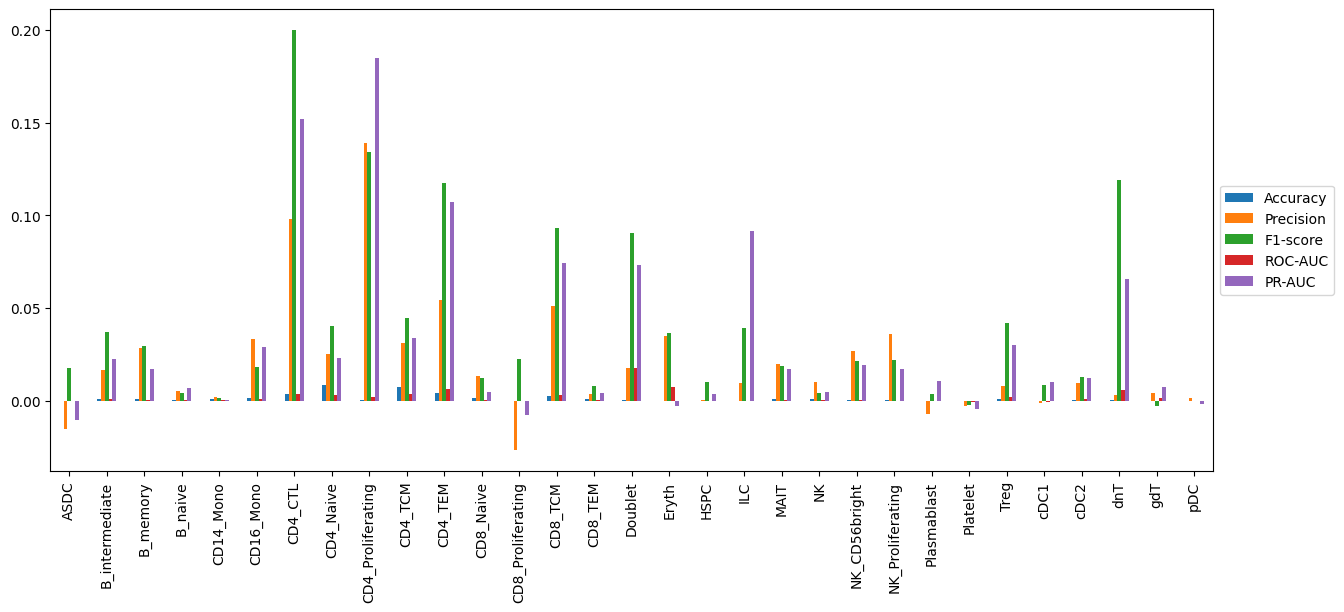

In [9]:
plot_metric(diff, figsize=(15,6))

## SVM

In [11]:
# svm_l1 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\SVM_model\rbf\SVM_metrics_rbf_StandardScale_l1.csv", index_col=0)
# svm_l1_deg = pd.read_csv(r"C:\Users\evanlee\Desktop\L1_SVM_DEGn\SVM_metrics_rbf_StandardScale_l1_DEG.csv", index_col=0)
svm_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l1.csv', index_col=0)
svm_l1_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/DEG_L1/SVM_metrics_rbf_StandardScale_l1_DEG.csv', index_col=0)

In [12]:
diff = svm_l1 - svm_l1_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
B,0.000580,0.005483,0.001268,0.003383,0.000892,0.006627,0.003696
CD4_T,0.031149,0.093323,0.008079,0.054732,0.023530,0.095582,0.072560
CD8_T,0.009080,0.040157,0.007853,0.025652,0.008581,0.044096,0.029946
DC,0.000100,-0.002792,0.008359,0.002450,0.004136,0.004702,0.002676
Mono,0.001236,0.004222,-0.000306,0.001998,0.000800,0.004009,0.002851
NK,0.000077,-0.000809,0.001675,0.000374,0.000772,0.000590,0.000455
other,0.264492,0.018225,-0.244738,0.012211,0.015418,0.003422,0.021925
other_T,0.001113,-0.002686,0.032223,0.015196,0.015986,0.025838,0.015540


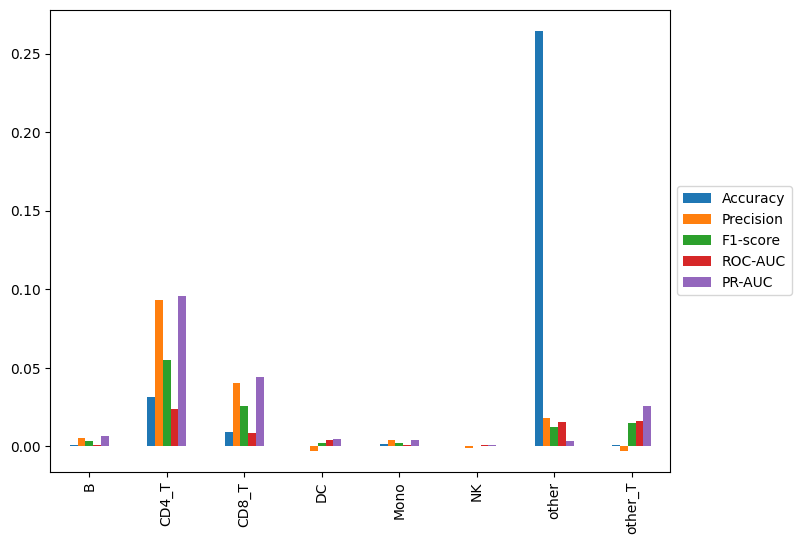

In [13]:
plot_metric(diff)

In [14]:
# svm_l2 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\SVM_model\rbf\SVM_metrics_rbf_StandardScale_l2.csv", index_col=0)
# svm_l2_deg = pd.read_csv(r"C:\Users\evanlee\Desktop\L2_SVM_DEGn\SVM_metrics_rbf_StandardScale_l2_DEG.csv", index_col=0)
svm_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
svm_l2_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/SVM_metrics_rbf_StandardScale_l2_DEG.csv', index_col=0)

In [15]:
diff = svm_l2 - svm_l2_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.000124,-0.076364,3.243590e-01,0.242911,0.162164,0.268400,0.188442
B_intermediate,0.002303,-0.025057,2.359897e-01,0.114610,0.117363,0.169415,0.111077
B_memory,0.001406,0.033895,3.310664e-02,0.033502,0.016928,0.061126,0.034219
B_naive,0.000603,0.009045,-4.858300e-04,0.005163,0.000086,0.008599,0.004986
CD14_Mono,0.000858,0.003270,-2.342563e-04,0.001568,0.000507,0.003091,0.002111
CD16_Mono,0.000610,0.009529,2.175281e-03,0.006562,0.001361,0.011077,0.006491
CD4_CTL,0.003786,0.180531,1.569800e-01,0.169162,0.079552,0.265523,0.170868
CD4_Naive,0.009427,0.048851,3.032278e-02,0.040516,0.018609,0.069846,0.045244
CD4_Proliferating,0.000286,0.154657,4.183007e-01,0.316972,0.209154,0.392871,0.302187
CD4_TCM,0.008925,0.050204,1.729530e-02,0.038002,0.012686,0.057935,0.040286


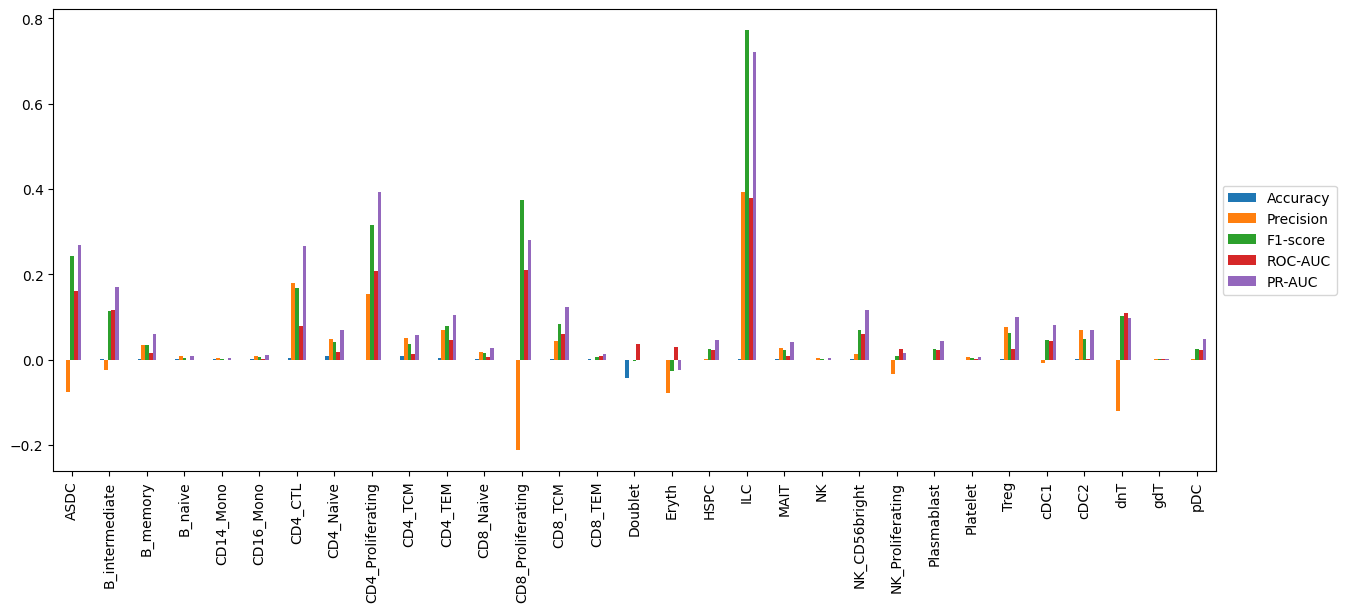

In [16]:
plot_metric(diff, figsize=(15,6))

## LR

In [17]:
# lr_l1 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\LR_likelihood\LR_metrics_L1_k3_stratifiedKF.csv", index_col=0)
# lr_l1_deg = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\DEG_L1\LR_DEG_metrics_l1.csv", index_col=0)
lr_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/LR_likelihood/LR_metrics_L1_k3_stratifiedKF.csv', index_col=0)
lr_l1_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/DEG_L1/LR_DEG_metrics_l1.csv', index_col=0)

In [18]:
diff = lr_l1 - lr_l1_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
B,0.000850,0.002469,0.007518,0.005002,0.000149,0.000831,0.005461
CD4_T,0.028166,0.053939,0.057651,0.055801,0.011335,0.031158,0.074632
CD8_T,0.004443,0.010834,0.018503,0.014910,0.003931,0.011347,0.017350
DC,0.000216,0.002908,0.006969,0.004969,0.000207,0.003650,0.005064
Mono,0.000603,0.002344,-0.000434,0.000973,0.000316,0.000877,0.001391
NK,0.002836,0.014254,0.010180,0.012219,0.000068,0.003166,0.013822
other,-0.000062,-0.007833,0.003266,-0.000472,0.020390,0.029468,-0.001431
other_T,0.002411,0.015815,0.046586,0.032729,0.004504,0.030853,0.033147


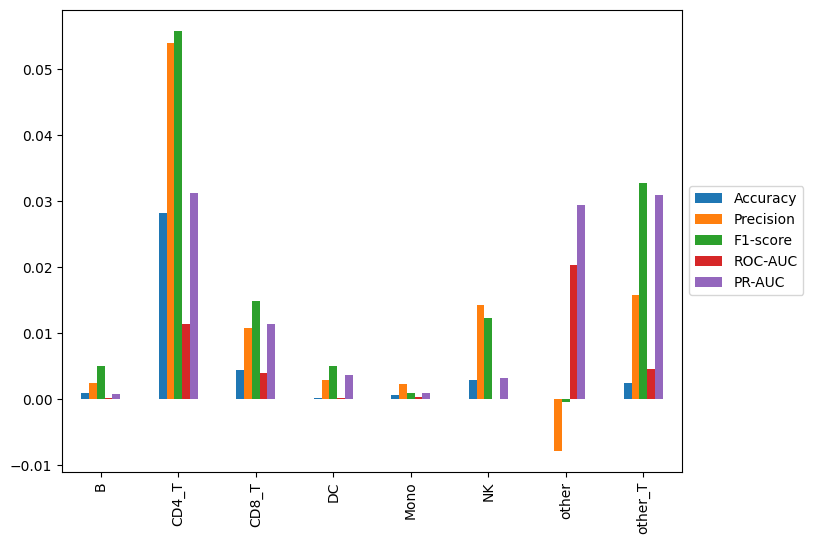

In [19]:
plot_metric(diff)

In [20]:
# lr_l2 = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\LR_likelihood\LR_metrics_l2_k3_stratifiedKF.csv", index_col=0)
# lr_l2_deg = pd.read_csv(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\DEG_L2\LR_DEG_metrics_l2.csv", index_col=0)
lr_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/LR_likelihood/LR_metrics_l2_k3_stratifiedKF.csv', index_col=0)
lr_l2_deg = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/LR_DEG_metrics_l2.csv', index_col=0)

In [21]:
diff = lr_l2 - lr_l2_deg
diff

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.000008,0.006277,0.017949,0.010157,0.000015,0.010892,0.011140
B_intermediate,0.002032,0.047170,0.105913,0.080206,0.001842,0.075261,0.079347
B_memory,0.001638,0.039551,0.041485,0.040505,0.000735,0.024641,0.041348
B_naive,0.001360,0.013809,0.014740,0.014278,0.000436,0.012982,0.014990
CD14_Mono,0.000865,0.002203,0.001025,0.001621,0.000113,0.000427,0.002205
CD16_Mono,0.000695,0.016948,-0.000991,0.008069,0.000715,0.031972,0.008383
CD4_CTL,0.004320,0.165203,0.313947,0.256814,0.006574,0.257867,0.250241
CD4_Naive,0.009659,0.037116,0.053995,0.045557,0.004029,0.029151,0.050958
CD4_Proliferating,0.000077,0.016196,0.115033,0.082061,0.000837,0.127645,0.074013
CD4_TCM,0.007990,0.034012,0.060533,0.047938,0.005963,0.046609,0.051883


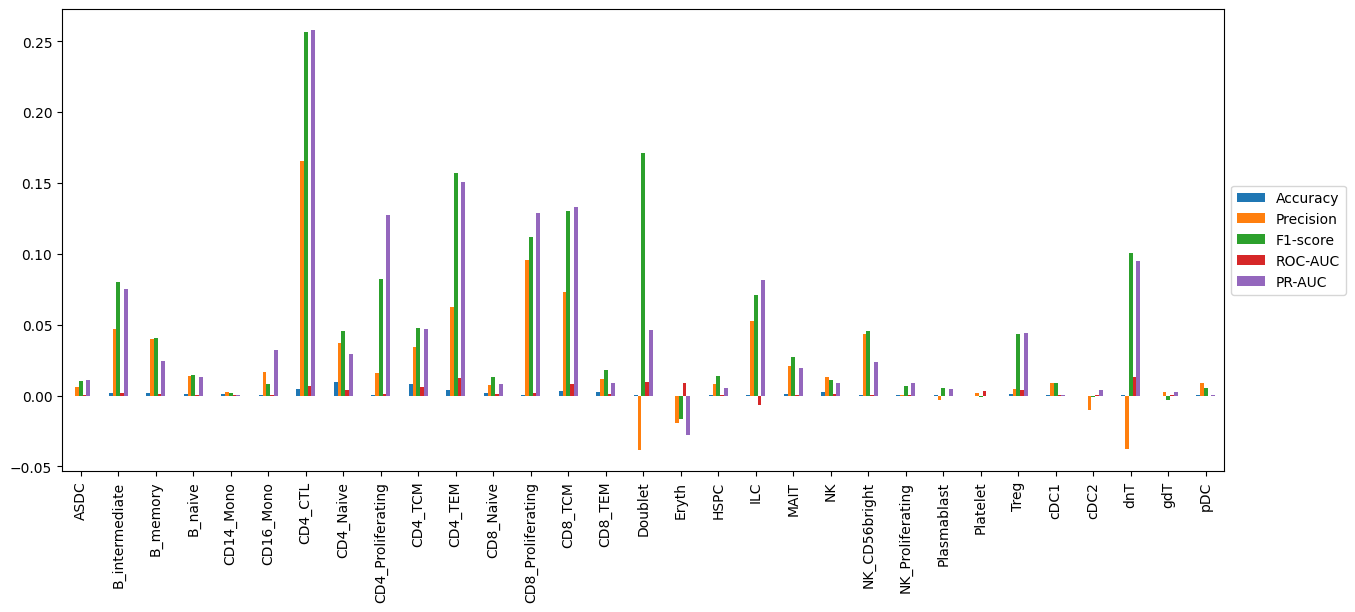

In [22]:
plot_metric(diff, figsize=(15,6))